First, dive in and explore the data set. Include your code and visuals from this process in your final write up. While doing this, look for something that provokes a question; specifically one that can be answered with an experiment.

The main component of this capstone is a research proposal. Using the data set you selected, propose and outline an experiment plan. The plan should consist of three key components:

1) Analysis that highlights your experimental hypothesis.

2) A rollout plan showing how you would implement and rollout the experiment

3) An evaluation plan showing what constitutes success in this experiment

Your experiment should be as real as possible. Though you obviously will not have access to the full production environment to deploy your experiment, it should be feasible and of interest to the parties involved with your actual data source.

The target size of your research proposal should be 3-5 pages.

In [188]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import seaborn as sns

import chardet
import codecs

from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf

import folium
from folium import plugins
from scipy import stats

%matplotlib inline
plt.style.use('seaborn-white')

In [189]:
df = pd.read_csv('/Users/mille/Desktop/Capstone 2 - Experimental Design/part2_UFO.csv')


In [190]:
df.head()

,city,state,country,shape,duration_sec,comments,date_posted,Latitude,Longitude,Day_date_posted,Month_date_posted,Year_date_posted
0,San Marcos,TX,US,Cylinder,2700.0,This event took place in early fall around 194...,4/27/2004,29.883056,-97.941111,27,4,2004
1,Lackland Afb,TX,NaN,Light,7200.0,1949 Lackland AFB 44 TX. Lights racing acros...,12/16/2005,29.384210,-98.581082,16,12,2005
2,Chester (Uk/England),NaN,GB,Circle,20.0,Green/Orange circular disc over Chester 44 En...,1/21/2008,53.200000,-2.916667,21,1,2008
3,Edna,TX,US,Circle,20.0,My older brother and twin sister were leaving ...,1/17/2004,28.978333,-96.645833,17,1,2004
4,Kaneohe,HI,US,Light,900.0,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.418056,-157.803611,22,1,2004


In [191]:
df.dtypes


city                  object
state                 object
country               object
shape                 object
duration_sec         float64
comments              object
date_posted           object
Latitude             float64
Longitude            float64
Day_date_posted        int64
Month_date_posted      int64
Year_date_posted       int64
dtype: object

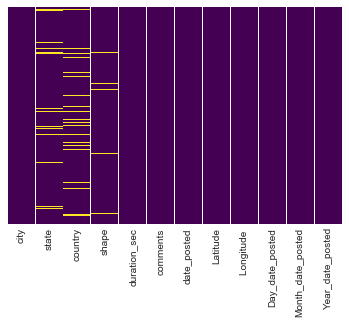

In [192]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80331 entries, 0 to 80330
Data columns (total 12 columns):
city                 80331 non-null object
state                74534 non-null object
country              70662 non-null object
shape                78399 non-null object
duration_sec         80328 non-null float64
comments             80316 non-null object
date_posted          80331 non-null object
Latitude             80331 non-null float64
Longitude            80331 non-null float64
Day_date_posted      80331 non-null int64
Month_date_posted    80331 non-null int64
Year_date_posted     80331 non-null int64
dtypes: float64(3), int64(3), object(6)
memory usage: 7.4+ MB


In [194]:
df_count = df.isnull().sum()


In [195]:
df_count[0:11]


city                    0
state                5797
country              9669
shape                1932
duration_sec            3
comments               15
date_posted             0
Latitude                0
Longitude               0
Day_date_posted         0
Month_date_posted       0
dtype: int64

https://www.mapbox.com/studio/datasets/miller78/cjrd5ajmo2a1k33n5qo5fs57h/edit/


In [196]:
sea = df.groupby(['city']).get_group('Seattle')


sea

,city,state,country,shape,duration_sec,comments,date_posted,Latitude,Longitude,Day_date_posted,Month_date_posted,Year_date_posted
113,Seattle,WA,US,Sphere,90.0,Light falls from sky,10/15/2002,47.606389,-122.330833,15,10,2002
143,Seattle,WA,US,Other,60.0,round symetrical with roundish flat bottom shi...,10/11/2005,47.606389,-122.330833,11,10,2005
197,Seattle,WA,US,Light,180.0,Around 8:00 pm? I Went out side and looked up ...,10/31/2008,47.606389,-122.330833,31,10,2008
393,Seattle,WA,US,Triangle,10.0,I saw two orange colored lights 44 close toge...,11/28/2007,47.606389,-122.330833,28,11,2007
685,Seattle,WA,US,NaN,1.0,just a meteor sighting...,10/12/2001,47.606389,-122.330833,12,10,2001
702,Seattle,WA,US,Unknown,1.0,On the morning of 10/01/02 I was driving to wo...,10/15/2002,47.606389,-122.330833,15,10,2002
703,Seattle,WA,US,Teardrop,3.0,Initially a comet in appearance 44 but speed ...,10/15/2002,47.606389,-122.330833,15,10,2002
704,Seattle,WA,US,Other,2.0,I saw a green object above Seattle 44 at abou...,10/15/2002,47.606389,-122.330833,15,10,2002
815,Seattle,WA,US,Teardrop,12.0,Very large yellow teardrop-shaped disk or mete...,10/30/2006,47.606389,-122.330833,30,10,2006
818,Seattle,WA,US,Light,20.0,A VERY bright and transluscent light that seem...,10/30/2006,47.606389,-122.330833,30,10,2006


In [197]:
sd = sea.groupby(['shape']).get_group('Light')
sd

sd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113 entries, 197 to 79429
Data columns (total 12 columns):
city                 113 non-null object
state                113 non-null object
country              113 non-null object
shape                113 non-null object
duration_sec         113 non-null float64
comments             112 non-null object
date_posted          113 non-null object
Latitude             113 non-null float64
Longitude            113 non-null float64
Day_date_posted      113 non-null int64
Month_date_posted    113 non-null int64
Year_date_posted     113 non-null int64
dtypes: float64(3), int64(3), object(6)
memory usage: 11.5+ KB


In [198]:
sea['shape'].count()

473

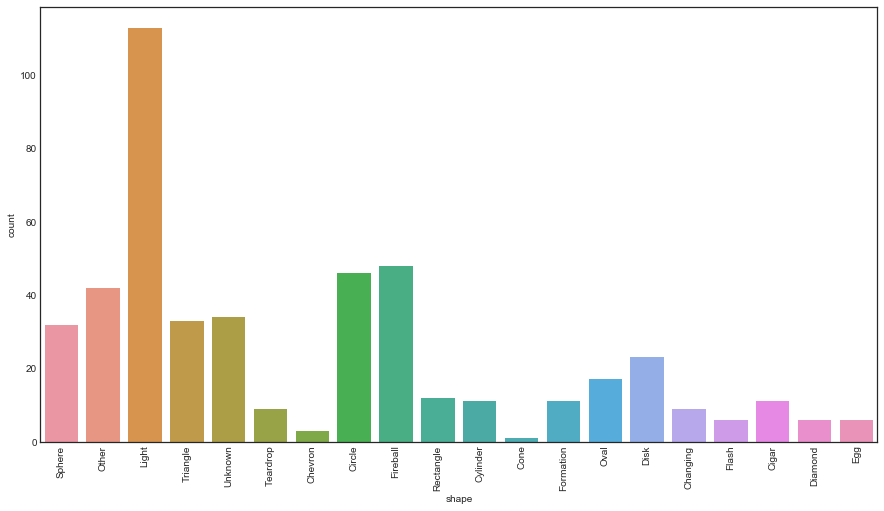

In [199]:
fig,ax = plt.subplots(figsize=(15,8))

ax = sns.countplot(x="shape", data=sea)
ticks = plt.setp(ax.get_xticklabels(),rotation=90)

Seattle		         Views by shape	 Total Views	   Conversion Rate
Baseline	Average	      26	     525	           0.049
A	        Triangle	  33 	     525	           0.0628
B	        Light	     113	     525	           0.215


T-Test in Duration Time between 1999 and 2000 for Seattle, WA

In [222]:
sea_a.describe()

,duration_sec,Latitude,Longitude,Day,Month,Year
count,8.000000,8.000000e+00,8.000000,8.000000,8.000000,8.0
mean,24.437500,4.760639e+01,-122.330833,14.125000,8.750000,2000.0
std,33.540421,7.596021e-15,0.000000,10.343217,3.412163,0.0
min,1.500000,4.760639e+01,-122.330833,2.000000,2.000000,2000.0
25%,3.000000,4.760639e+01,-122.330833,2.000000,7.750000,2000.0
50%,4.000000,4.760639e+01,-122.330833,18.000000,8.500000,2000.0
75%,37.500000,4.760639e+01,-122.330833,23.000000,12.000000,2000.0
max,90.000000,4.760639e+01,-122.330833,25.000000,12.000000,2000.0


In [221]:
sd = sea.groupby(['shape']).get_group('Light')
sd

sea_b = sd.groupby(['Year_date_posted']).get_group(1999)
sea_b

,city,state,country,shape,duration_sec,comments,date_posted,Latitude,Longitude,Day_date_posted,Month_date_posted,Year_date_posted
8643,Seattle,WA,US,Light,8.0,Looked up in the sky in a S-SW direction. Not...,1/28/1999,47.606389,-122.330833,28,1,1999
14319,Seattle,WA,US,Light,2.0,Seen in the SE sky over chuch 44 bright light...,1/28/1999,47.606389,-122.330833,28,1,1999
18647,Seattle,WA,US,Light,4.0,Definitely a meteor 44 IMHO. steady white lig...,1/28/1999,47.606389,-122.330833,28,1,1999
19050,Seattle,WA,US,Light,4.0,Walking around Greenlake on paved trail. Saw b...,5/24/1999,47.606389,-122.330833,24,5,1999
20154,Seattle,WA,US,Light,20.0,Man witnesses very bright 44 multi-colored ob...,11/2/1999,47.606389,-122.330833,2,11,1999
22171,Seattle,WA,US,Light,2.0,Man reports a brief power failure 44 looks ou...,11/2/1999,47.606389,-122.330833,2,11,1999
23434,Seattle,WA,US,Light,5.0,intense blue light travelling se across entire...,12/16/1999,47.606389,-122.330833,16,12,1999
24655,Seattle,WA,US,Light,5.0,MUFON member witnesses very bright light durin...,11/2/1999,47.606389,-122.330833,2,11,1999
48028,Seattle,WA,US,Light,5.0,Two young men 44 unloading van 44 see 3x pin...,11/2/1999,47.606389,-122.330833,2,11,1999
54666,Seattle,WA,US,Light,180.0,Blue light rise maybe 20-40 miles away. Blue l...,7/14/1999,47.606389,-122.330833,14,7,1999


In [204]:
sea_b.describe()

,duration_sec,Latitude,Longitude,Day,Month,Year
count,11.000000,1.100000e+01,11.000000,11.000000,11.000000,11.0
mean,22.636364,4.760639e+01,-122.330833,14.545455,7.090909,1999.0
std,52.477181,7.452235e-15,0.000000,11.246009,4.482288,0.0
min,2.000000,4.760639e+01,-122.330833,2.000000,1.000000,1999.0
25%,4.000000,4.760639e+01,-122.330833,2.000000,3.000000,1999.0
50%,5.000000,4.760639e+01,-122.330833,14.000000,7.000000,1999.0
75%,11.000000,4.760639e+01,-122.330833,26.000000,11.000000,1999.0
max,180.000000,4.760639e+01,-122.330833,28.000000,12.000000,1999.0


2000 - sea_a(mean) = 24.437500

2000 - sea_a(std) = 33.540421


1999 - sea_b(mean) = 22.636364

1999 - sea_b(std) = 52.477181

In [205]:
print('Mean Seattle 2000:', sea_a['duration_sec'].mean())
print('Mean Seattle 1999:', sea_b['duration_sec'].mean())
print('-------')
print('Std Seattle 2000:', sea_a['duration_sec'].std())
print('Std Seattle 1999:', sea_b['duration_sec'].std())

Mean Seattle 2000: 24.4375
Mean Seattle 1999: 22.636363636363637
-------
Std Seattle 2000: 33.540420710369325
Std Seattle 1999: 52.477181188155924


In [206]:
diff=sea_b['duration_sec'].mean( ) - sea_a['duration_sec'].mean()
print('Difference in Means between 1999 and 2000 in duration time:', diff)

Difference in Means between 1999 and 2000 in duration time: -1.8011363636363633


In [207]:
size = np.array([len(sea_a['duration_sec']), len(sea_b['duration_sec'])])
sd = np.array([sea_a['duration_sec'].std(), sea_b['duration_sec'].std()])

diff_se = (sum(sd ** 2 / size)) ** 0.5  

print('Difference in means divided by std error - T-Value:', diff/diff_se)

Difference in means divided by std error - T-Value: -0.09109083018006274


In [208]:
from scipy.stats import ttest_ind
print('T-statistic and p-value for the 2 sample populations:', ttest_ind(sea_b['duration_sec'], sea_a['duration_sec'], equal_var=False))
#null hypothesis the means are the same
#alternate hypothesis means are difference 
# p-value the difference between observed means
# p-value what is the probability of see the difference of the means were true this a relatively rare event. 
# Reject Null 

T-statistic and p-value for the 2 sample populations: Ttest_indResult(statistic=-0.09109083018006274, pvalue=0.9284969750177802)


In [223]:


globe_a = df.groupby(['Year_date_posted']).get_group(2012)
globe_a
ga = globe_a.groupby(['shape']).get_group('Light')
ga

,city,state,country,shape,duration_sec,comments,date_posted,Latitude,Longitude,Day_date_posted,Month_date_posted,Year_date_posted
217,North Charleston,SC,US,Light,180.0,Object(s) visible 3 times at same place in the...,7/4/2012,32.854444,-79.975000,4,7,2012
250,Syracuse,NY,US,Light,900.0,Went to move my car to the other side of the r...,10/30/2012,43.048056,-76.147778,30,10,2012
252,Colorado Springs,CO,US,Light,20.0,Bright zig zagging light in the sky above norad.,10/30/2012,38.833889,-104.820833,30,10,2012
257,Marion,IL,US,Light,240.0,I was leaving my friend 39s house to go home....,10/30/2012,37.730556,-88.933056,30,10,2012
260,Yakima,WA,US,Light,240.0,Noticed light in the N.E. section of the sky a...,10/30/2012,46.602222,-120.504722,30,10,2012
263,Rochester,WA,US,Light,600.0,Fleet of red UFO 39s emerging from Mt. Rainier.,11/19/2012,46.821944,-123.095000,19,11,2012
441,Tewksbury,MA,US,Light,2.0,Huge white streaking object moving high rate o...,10/30/2012,42.610556,-71.234722,30,10,2012
444,Arbutus,MD,US,Light,300.0,Moving star and strange man,10/30/2012,39.254444,-76.700278,30,10,2012
709,Natrona Heights&#44 New Kensington,PA,NaN,Light,7200.0,Westmoreland amp; Allegheny County UFO Phenom...,10/30/2012,40.616187,-79.724110,30,10,2012
935,Hamburg,CA,US,Light,300.0,Extremely bright twin lights in night sky - mo...,5/29/2012,41.783056,-123.059167,29,5,2012


In [224]:
globe_b = df.groupby(['Year_date_posted']).get_group(2013)
globe_b
gb = globe_b.groupby(['shape']).get_group('Light')
gb



,city,state,country,shape,duration_sec,comments,date_posted,Latitude,Longitude,Day_date_posted,Month_date_posted,Year_date_posted
266,Clifton,NJ,NaN,Light,60.0,Bright light 33 33,10/14/2013,40.858433,-74.163755,14,10,2013
269,St. Louis County,MO,US,Light,10800.0,Hovering bright object moving slowly around St...,10/23/2013,38.627222,-90.197778,23,10,2013
270,Ottawa (Canada),ON,CA,Light,10.0,FATHER: My name is Eldon Trepanier 44 and I ...,10/14/2013,45.416667,-75.700000,14,10,2013
271,Rittman,OH,US,Light,60.0,Fast moving white light.,10/14/2013,40.978056,-81.782222,14,10,2013
272,Harvey Station (Canada),NB,CA,Light,120.0,Slow moving bright orange light.,10/23/2013,45.716667,-67.000000,23,10,2013
273,Essex Junction,VT,US,Light,120.0,Noiseless 44 low flying 44 white 44 bright ...,10/14/2013,44.490556,-73.111389,14,10,2013
276,Hudson,NH,US,Light,5.0,White 44 orb above the clouds moving very fas...,10/14/2013,42.764722,-71.440278,14,10,2013
277,Grand Blanc,MI,US,Light,1200.0,3 bright lights holding a vertical position ov...,10/14/2013,42.927500,-83.630000,14,10,2013
282,Hudson,NH,US,Light,1.0,Very white bright light moving fast inside clo...,10/14/2013,42.764722,-71.440278,14,10,2013
286,Minnetonka,MN,US,Light,30.0,White light moves west to east 44 suddenly st...,10/14/2013,44.913333,-93.503056,14,10,2013


In [229]:
print("2013: Test Sample size: 1593")
print("2012: Test Sample size: 1647")
print("2013: Control Sample 7562")
print("2012: Control Sample 8089")

print("2012: test porportion", 1593/8089)
print("2013: test porportion", 1647/7562)

print('UFO duration sighting:', globe_a[globe_a.Day_date_posted == 1].duration_sec.mean())
print('UFO duration sighting:', globe_a[globe_a.Day_date_posted == 0].duration_sec.mean())

stats.ttest_ind(globe_a[globe_a.Day_date_posted == 1].duration_sec,
                globe_a[globe_a.Day_date_posted == 0].duration_sec)

2013: Test Sample size: 1593
2012: Test Sample size: 1647
2013: Control Sample 7562
2012: Control Sample 8089
2012: test porportion 0.19693410804796638
2013: test porportion 0.2177995239354668
UFO duration sighting: nan
UFO duration sighting: nan


Ttest_indResult(statistic=nan, pvalue=nan)

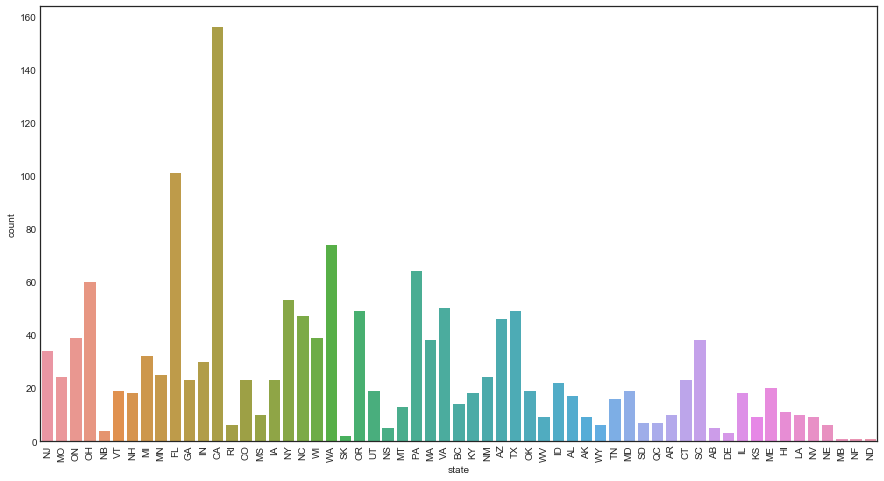

In [212]:
fig,ax = plt.subplots(figsize=(15,8))

ax = sns.countplot(x="state", data=gb)
ticks = plt.setp(ax.get_xticklabels(),rotation=90)

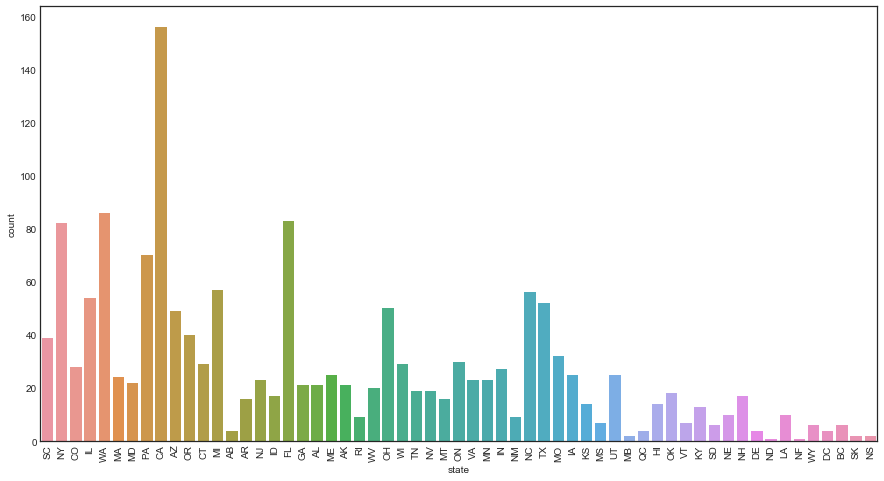

In [213]:
fig,ax = plt.subplots(figsize=(15,8))

ax = sns.countplot(x="state", data=ga)
ticks = plt.setp(ax.get_xticklabels(),rotation=90)

In [215]:
globe_a.duration_sec.describe()
#1.567445 * 10000

count    8.089000e+03
mean     8.102897e+03
std      5.862123e+05
min      1.000000e-02
25%      4.500000e+01
50%      1.800000e+02
75%      6.000000e+02
max      5.262320e+07
Name: duration_sec, dtype: float64

https://docs.google.com/spreadsheets/d/1zf4aw-VPlE9qfCq4IS_JS48aYTWGSTsfawWWvyWQbes/edit?usp=sharing

In [216]:
print('Mean Global 2012:', globe_a['duration_sec'].mean())
print('Mean Global 2013:', globe_b['duration_sec'].mean())
print('-------')
print('Std Global 2012:', globe_a['duration_sec'].std())
print('Std Global 2013:', globe_b['duration_sec'].std())

Mean Global 2012: 8102.896882185683
Mean Global 2013: 17570.33718857445
-------
Std Global 2012: 586212.3433735404
Std Global 2013: 1139156.149967398


In [217]:
diff=globe_b['duration_sec'].mean( ) - globe_a['duration_sec'].mean()
print('Difference in Means between 2013 and 2012 in duration time:', diff)

Difference in Means between 2013 and 2012 in duration time: 9467.440306388766


In [218]:
size = np.array([len(globe_a['duration_sec']), len(globe_b['duration_sec'])])
sd = np.array([globe_a['duration_sec'].std(), globe_b['duration_sec'].std()])

diff_se = (sum(sd ** 2 / size)) ** 0.5  

print('Difference in means divided by std error - T-Value:', diff/diff_se)

Difference in means divided by std error - T-Value: 0.6470479408870689


In [219]:
from scipy.stats import ttest_ind
print('T-statistic and p-value for the 2 sample populations:', ttest_ind(globe_b['duration_sec'], globe_a['duration_sec'], equal_var=False))
#null hypothesis the means are the same
#alternate hypothesis means are difference 
# p-value the difference between observed means
# p-value what is the probability of see the difference of the means were true this a relatively rare event. 
# Reject Null 

T-statistic and p-value for the 2 sample populations: Ttest_indResult(statistic=0.6470479408870708, pvalue=0.5176142599871638)
